In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
student = pd.read_csv('student-mat.csv')
student.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [45]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [46]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [47]:
x= student['freetime'].values


In [48]:
x

array([3, 3, 3, 2, 3, 4, 4, 1, 2, 5, 3, 2, 3, 4, 5, 4, 2, 3, 5, 1, 4, 4,
       5, 4, 3, 2, 2, 2, 3, 4, 4, 3, 5, 3, 4, 5, 4, 4, 3, 3, 3, 4, 3, 4,
       3, 2, 3, 2, 3, 4, 3, 3, 5, 3, 3, 3, 3, 2, 3, 2, 4, 5, 4, 4, 4, 4,
       3, 3, 1, 4, 3, 3, 3, 3, 3, 3, 4, 2, 5, 4, 2, 3, 4, 3, 3, 4, 3, 3,
       4, 1, 3, 5, 3, 3, 3, 1, 3, 3, 3, 3, 5, 4, 3, 3, 4, 3, 1, 3, 3, 4,
       5, 1, 1, 5, 4, 4, 4, 4, 2, 4, 2, 5, 2, 4, 4, 5, 3, 4, 3, 5, 2, 3,
       4, 2, 3, 3, 4, 3, 4, 3, 2, 3, 2, 4, 4, 4, 3, 3, 3, 5, 3, 4, 2, 5,
       2, 4, 2, 2, 2, 5, 3, 4, 4, 3, 3, 5, 3, 2, 1, 4, 4, 3, 4, 3, 4, 4,
       4, 3, 3, 2, 4, 2, 4, 3, 2, 3, 3, 2, 3, 1, 3, 3, 4, 3, 3, 3, 2, 3,
       2, 5, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 2, 4, 4, 2, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 5, 5, 2, 4, 3, 4, 5, 1, 5, 5, 3,
       4, 3, 4, 3, 2, 4, 3, 3, 4, 3, 2, 3, 4, 4, 2, 3, 2, 4, 1, 3, 3, 2,
       3, 2, 4, 3, 4, 3, 3, 5, 4, 5, 3, 4, 1, 2, 4, 2, 5, 4, 2, 4, 4, 3,
       3, 3, 2, 4, 3, 2, 4, 1, 4, 4, 3, 4, 3, 4, 2,

In [49]:
y = student['studytime'].values

In [50]:
y

array([2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 3, 1, 3, 2, 1, 1, 2, 1,
       2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 1, 2, 1, 2, 1,
       2, 2, 2, 4, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2,
       4, 4, 2, 4, 4, 4, 2, 1, 2, 2, 4, 4, 1, 2, 1, 3, 2, 2, 2, 2, 2, 3,
       2, 2, 3, 1, 2, 2, 4, 4, 1, 2, 1, 3, 1, 3, 1, 2, 2, 4, 4, 3, 4, 3,
       1, 3, 2, 1, 2, 2, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 2, 1, 1, 3, 1,
       1, 1, 2, 3, 2, 1, 2, 1, 4, 1, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 4, 3, 2, 2, 1, 3, 4, 2, 2, 2, 1, 2, 2, 2, 1, 3,
       2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2,
       1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 2, 2, 4, 2, 2, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 4, 2, 2, 2,
       3, 3, 3, 2, 2, 3, 2, 4, 3, 1, 2, 2, 4, 1, 2,

In [51]:
x = x.reshape(-1,1)

In [52]:
x

array([[3],
       [3],
       [3],
       [2],
       [3],
       [4],
       [4],
       [1],
       [2],
       [5],
       [3],
       [2],
       [3],
       [4],
       [5],
       [4],
       [2],
       [3],
       [5],
       [1],
       [4],
       [4],
       [5],
       [4],
       [3],
       [2],
       [2],
       [2],
       [3],
       [4],
       [4],
       [3],
       [5],
       [3],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [3],
       [2],
       [3],
       [2],
       [3],
       [4],
       [3],
       [3],
       [5],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3],
       [2],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [3],
       [3],
       [1],
       [4],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [4],
       [2],
       [5],
       [4],
       [2],
       [3],
       [4],
    

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

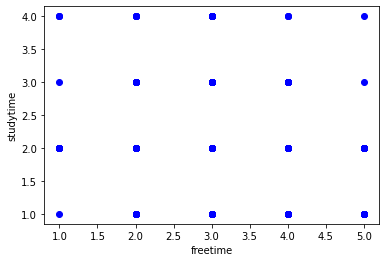

In [54]:
%matplotlib inline
plt.scatter(x_train, y_train, color='blue')
plt.xlabel('freetime')
plt.ylabel('studytime')
plt.show()

In [55]:
x_train

array([[4],
       [4],
       [2],
       [4],
       [2],
       [4],
       [3],
       [3],
       [4],
       [3],
       [3],
       [3],
       [3],
       [3],
       [4],
       [3],
       [3],
       [3],
       [5],
       [2],
       [4],
       [1],
       [3],
       [4],
       [3],
       [4],
       [4],
       [3],
       [2],
       [2],
       [5],
       [4],
       [3],
       [4],
       [4],
       [2],
       [2],
       [3],
       [5],
       [2],
       [2],
       [3],
       [4],
       [4],
       [4],
       [4],
       [3],
       [3],
       [4],
       [3],
       [3],
       [4],
       [2],
       [3],
       [5],
       [3],
       [3],
       [4],
       [1],
       [3],
       [4],
       [4],
       [4],
       [2],
       [4],
       [2],
       [2],
       [2],
       [4],
       [4],
       [3],
       [4],
       [3],
       [4],
       [2],
       [2],
       [4],
       [3],
       [2],
       [5],
       [3],
       [5],
       [3],
    

In [56]:
y_train

array([3, 2, 2, 2, 1, 1, 2, 1, 3, 2, 3, 1, 2, 3, 2, 2, 2, 3, 1, 3, 2, 1,
       2, 2, 3, 2, 4, 2, 4, 1, 1, 2, 2, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2,
       3, 1, 2, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 3, 1, 2, 2, 1,
       2, 3, 1, 3, 1, 2, 1, 1, 1, 3, 2, 2, 1, 2, 2, 4, 1, 1, 2, 1, 1, 4,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 3, 2, 2, 1, 2, 3, 1, 3, 2, 2,
       3, 2, 2, 4, 1, 2, 1, 2, 2, 3, 2, 2, 3, 2, 1, 3, 2, 3, 3, 2, 2, 3,
       1, 2, 2, 3, 1, 2, 2, 3, 1, 2, 2, 4, 3, 3, 3, 3, 4, 2, 1, 1, 1, 3,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 1, 1, 3, 2,
       2, 4, 3, 2, 1, 1, 3, 4, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 4, 3, 1, 3, 2, 3, 1, 3, 3, 2, 3, 1, 2, 2, 1, 3, 1, 2,
       1, 1, 2, 2, 1, 4, 1, 2, 4, 1, 1, 2, 4, 1, 1, 4, 1, 3, 2, 3, 1, 2,
       2, 1, 2, 2, 2, 3, 4, 1, 2, 4, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 4, 2, 2, 2, 2, 3, 4, 2, 3, 2, 2, 2, 3, 1, 2, 3, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,

In [57]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [58]:
model

LinearRegression()

In [59]:
y_predict = model.predict(x_test)

In [60]:
y_predict

array([2.08099878, 2.08099878, 2.08099878, 1.95334079, 2.08099878,
       2.08099878, 1.8256828 , 2.08099878, 2.20865676, 2.08099878,
       2.20865676, 2.08099878, 1.95334079, 2.08099878, 1.8256828 ,
       2.08099878, 2.20865676, 2.33631475, 2.33631475, 2.08099878,
       1.95334079, 2.33631475, 2.20865676, 2.33631475, 2.08099878,
       1.8256828 , 1.95334079, 2.20865676, 1.95334079, 2.20865676,
       2.08099878, 2.08099878, 2.33631475, 2.20865676, 1.8256828 ,
       2.20865676, 1.8256828 , 2.08099878, 2.08099878, 2.20865676,
       2.20865676, 1.95334079, 2.08099878, 2.08099878, 2.33631475,
       2.08099878, 2.20865676, 2.20865676, 2.08099878, 2.20865676,
       1.95334079, 2.08099878, 2.08099878, 1.95334079, 1.95334079,
       1.95334079, 1.95334079, 1.8256828 , 2.08099878, 2.08099878,
       1.95334079, 1.95334079, 2.08099878, 2.08099878, 2.08099878,
       1.8256828 , 1.95334079, 1.8256828 , 1.95334079, 2.08099878,
       1.8256828 , 2.20865676, 1.95334079, 1.95334079, 1.82568

In [61]:
print(f'Training Accuracy: {model.score(x_train, y_train)*100}%')

Training Accuracy: 2.1594238100965835%


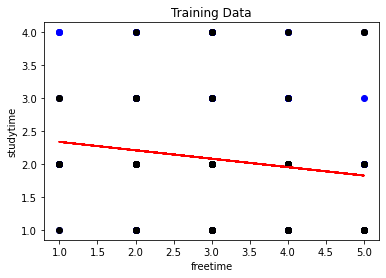

In [62]:
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_predict, color='red')
plt.xlabel('freetime')
plt.ylabel('studytime')
plt.title('Training Data')
plt.show()

### Conclusion:

- Students who study for more than 2 hours have no more than 2 hours of freetime.
- The more time the student studies, the less free time they have.
- Students who study for less than two hours have 5 hours of free time.